In this notebook, we will get an overview of how to generate word vectors using the various word embedding methods discussed in the lecture

### Objectives:
- Implement Count Vectors with sklearn
- Implement TF-IDF Vectors with sklearn and gensim
- Train and save word2vec model with gensim
- Load Google's pretrained word2vec model
- Load Stanford's pretrained GloVe model

In [223]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

In [224]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

corpus = twenty_train.data[0:50]

In [225]:
type(corpus)

list

In [226]:
len(corpus)

50

In [215]:
print(f"{corpus[0]}")

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(f"Dimensions of Document-term matrix: {X.toarray().shape}")

Dimensions of Document-term matrix: (50, 3075)


From the result above, we can see that the second dimension gives us the size of our vocabulary.

But why restrict ourselves to single words? We can pass an additional argument to the CountVectorizer() object to add n-grams to our vocabulary.

What is an n-gram?  It's just a collection of n consecutive words. For example:
"New", "York", "City", "subway" are all unigrams
"New York", "York City", "City subway" are bigrams
"New York City", "York City subway" are trigrams
"New York City subway" is a 4-gram

We can specify to include n-grams with the ngram_range argument.  This takes a tuple which specifies the range of n-grams that we should include (inclusively).

In [5]:
# Include unigrams, bigrams, and trigrams

vectorizer = CountVectorizer(ngram_range=(1,3))
X = vectorizer.fit_transform(corpus)

print(f"Dimensions of Document-term matrix: {X.toarray().shape}")

Dimensions of Document-term matrix: (50, 23397)


A common preprocessing step in many NLP applications is stop-word removal.
Common words like "a", "the", "and" often add a lot of noise, and don't typiccally contribute much to the task we are trying to solve.

CountVectorizer also comes equipped with a way of dealing with common English stop words!

In [6]:
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english')
X = vectorizer.fit_transform(corpus)

print(f"Dimensions of Document-term matrix: {X.toarray().shape}")

Dimensions of Document-term matrix: (50, 14300)


# TF-IDF Vectors

Here we will demonstrate two ways to generate TF-IDF vectors with both sklearn and gensim.  It's good to be aware of both methods because depending on your specific workflow, one method might be easier than the other!

In [212]:
# For sklearn, it's VERY similar to how we did CountVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
#vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_tfidf = vectorizer.fit_transform(corpus)

In [159]:
X_tfidf.shape

(50, 14300)

In [160]:
import numpy as np
# How do these two representations compare?
# Let's look at the first 50 dimensions of the first document to gain some intuition

np.set_printoptions(precision=3) # This just makes things a little easier to read

print(f"CountVector: {X.toarray()[0,0:50]}\n\n")

print(f"TFIDF: {X_tfidf.toarray()[0,0:50]}")

CountVector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 1 1 0 0 0 0 0 0 0]


TFIDF: [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.127 0.127 0.063 0.063 0.    0.    0.    0.    0.
 0.    0.   ]


Scikit-learn isn't our only option for doing TF-IDF.  Gensim is another popular library for many NLP tasks

In [161]:
import gensim

In [162]:
# Tokenize the documents
tokenized_docs = [gensim.utils.simple_preprocess(d) for d in corpus]
len(tokenized_docs)

50

In [163]:

# Create a Gensim Dictionary.  This creates an id to word mapping for everything in our vocbulary
# It is NOT the same as the dictionary object in the Python standard library
mydict = gensim.corpora.Dictionary()
mydict

In [164]:



# Create a Gensim Corpus object.  This creates a list of tuples for each document.
# The first element of the tuple is the word id, the second is the number of counts
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_docs]

get id for a word

In [165]:
mydict.token2id['also']

2

In [108]:
# This creates the doc-term matrix as a numpy array.
# Typically these matrices are HUGE so, it's usuall not a great idea to create the full dense doc-term matrix.
# We do it here to illustrate that you can get the same info as we obtained in scikit-learn!
doc_term_matrix = gensim.matutils.corpus2dense(mycorpus, num_terms=len(mydict))

In [109]:
doc_term_matrix.shape

(2907, 50)

In [110]:
# Creating a tf-idf model is very simple!
tfidf = gensim.models.TfidfModel(mycorpus)
tfidf_matrix = gensim.matutils.corpus2dense(tfidf[mycorpus], num_terms=len(mydict))

In [111]:
tfidf

In [112]:
len(mydict)

2907

In [113]:
mydict.token2id['apple']

2598

In [114]:
tfidf_matrix[mydict.token2id['news'],: ]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.046, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.065, 0.   ,
       0.   , 0.05 , 0.   , 0.   , 0.   , 0.   , 0.035, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.07 , 0.   ], dtype=float32)

In [115]:
tfidf_matrix[mydict.token2id['news'],6 ]

0.045599412

### Time series analysis of TF-IDF, graphed word by word

In [200]:
doc1 = "process concrescence, there is succession of phases in which new prehensions arise by integration of prehensions in the antececent phases"
#doc1 = "the philosophers never heard of prehension before philosophers coined prehension as prehension"
#doc2 = "every good good boy deserves fudge one day if behaving better than yesterday"
doc2 = "the good in good body joy as fire phases if behaving worse than in before"
doc3 = "the metal toys bring joy as fire trucks drive worse than yesterday"
doc4 = "the sketches go well before with fudge if eaten before today of course"
doc5 = "she sells sea shells by the sea shore"
corp = [doc1, doc2,doc3, doc4, doc5]

t_docs = [gensim.utils.simple_preprocess(d) for d in corp]

mynewdict = gensim.corpora.Dictionary()
mynewdict

mynewcorpus = [mynewdict.doc2bow(doc, allow_update=True) for doc in t_docs]

new_doc_term_matrix = gensim.matutils.corpus2dense(mynewcorpus, num_terms=len(mynewdict))

new_tfidf = gensim.models.TfidfModel(mynewcorpus)
new_tfidf_matrix = gensim.matutils.corpus2dense(new_tfidf[mynewcorpus], num_terms=len(mynewdict))

In [211]:
new_tfidf

In [201]:
doc1_list = doc1.split(' ')
doc1_list

['process',
 'concrescence,',
 'there',
 'is',
 'succession',
 'of',
 'phases',
 'in',
 'which',
 'new',
 'prehensions',
 'arise',
 'by',
 'integration',
 'of',
 'prehensions',
 'in',
 'the',
 'antececent',
 'phases']

In [202]:
doc2_list = doc2.split(' ')
doc3_list = doc3.split(' ')
doc4_list = doc4.split(' ')
doc5_list = doc5.split(' ')
#[new_tfidf_matrix[mynewdict.token2id[ word], 0 ] for word in doc2_list]
# mynewdict.token2id[ 'metal']
# new_tfidf_matrix[mynewdict.token2id[ 'metal'], 0 ]

In [222]:
try:
    new_tfidf_matrix[mynewdict.token2id[';']]
except:
    print('test')

test


In [203]:

intensities  = [new_tfidf_matrix[mynewdict.token2id[ word.replace(',','').lower()], 0 ] for word in doc1_list]
intensities2 = [new_tfidf_matrix[mynewdict.token2id[ word.replace(',','').lower()], 0 ] for word in doc2_list]
intensities3 = [new_tfidf_matrix[mynewdict.token2id[ word.replace(',','').lower()], 0 ] for word in doc3_list]
intensities4 = [new_tfidf_matrix[mynewdict.token2id[ word.replace(',','').lower()], 0 ] for word in doc4_list]
intensities5 = [new_tfidf_matrix[mynewdict.token2id[ word.replace(',','').lower()], 0 ] for word in doc5_list]

In [204]:
intensities 

[0.23431557,
 0.23431557,
 0.23431557,
 0.23431557,
 0.23431557,
 0.2668027,
 0.2668027,
 0.2668027,
 0.23431557,
 0.23431557,
 0.46863115,
 0.23431557,
 0.13340135,
 0.23431557,
 0.2668027,
 0.46863115,
 0.2668027,
 0.0,
 0.23431557,
 0.2668027]

In [205]:
np.mean(intensities)

0.25073177

In [206]:
intensities2

[0.0,
 0.0,
 0.2668027,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2668027,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2668027,
 0.0]

In [207]:
np.mean(intensities3)

0.0

In [208]:
np.mean(intensities4)

0.020523284

Text(0.5, 1.0, "Fluctuating verbal eccentricity in an excerpt from Alfred North Whitehead's Process and Reality'")

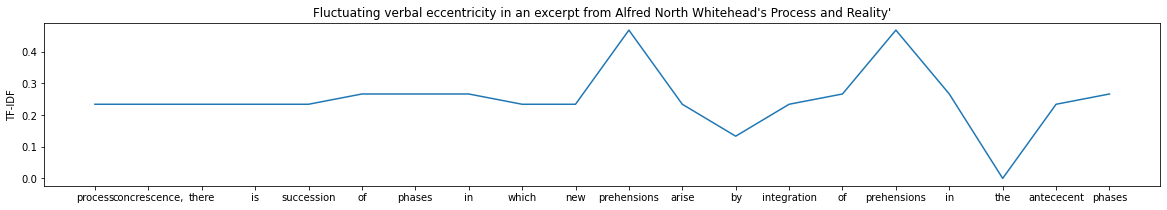

In [210]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [20,3]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(range(len(doc1_list)), intensities)
plt.ylabel("TF-IDF")
ax.set_xticks(range( len(doc1_list)))
ax.set_xticklabels(doc1_list)
ax.set_title("Fluctuating verbal eccentricity in an excerpt from Alfred North Whitehead\'s Process and Reality'")

[Text(0, 0, 'the'),
 Text(1, 0, 'good'),
 Text(2, 0, 'in'),
 Text(3, 0, 'good'),
 Text(4, 0, 'body'),
 Text(5, 0, 'joy'),
 Text(6, 0, 'as'),
 Text(7, 0, 'fire'),
 Text(8, 0, 'trucks'),
 Text(9, 0, 'if'),
 Text(10, 0, 'behaving'),
 Text(11, 0, 'worse'),
 Text(12, 0, 'than'),
 Text(13, 0, 'in'),
 Text(14, 0, 'before')]

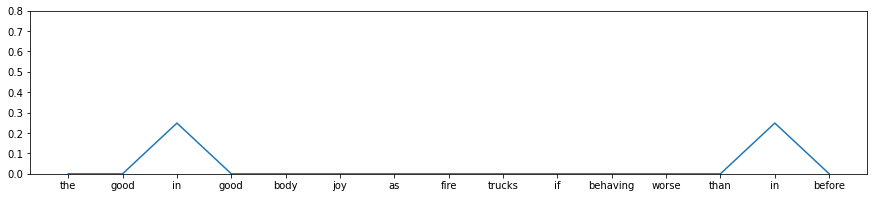

In [199]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15,3]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_ylim(0,.8)
ax.plot(range(len(doc2_list)), intensities2)
ax.set_xticks(range( len(doc2_list)))
ax.set_xticklabels(doc2_list)

[Text(0, 0, 'the'),
 Text(1, 0, 'metal'),
 Text(2, 0, 'toys'),
 Text(3, 0, 'bring'),
 Text(4, 0, 'joy'),
 Text(5, 0, 'as'),
 Text(6, 0, 'fire'),
 Text(7, 0, 'trucks'),
 Text(8, 0, 'drive'),
 Text(9, 0, 'worse'),
 Text(10, 0, 'than'),
 Text(11, 0, 'yesterday')]

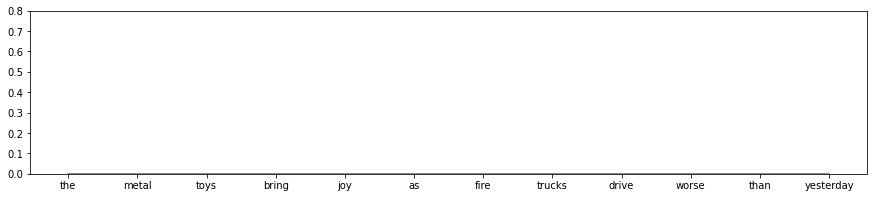

In [187]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15,3]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_ylim(0,.8)
ax.plot(range(len(doc3_list)), intensities3)
ax.set_xticks(range( len(doc3_list)))
ax.set_xticklabels(doc3_list)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15,3]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_ylim(0,.8)
ax.plot(range(len(doc4_list)), intensities4)
ax.set_xticks(range( len(doc4_list)))
ax.set_xticklabels(doc4_list)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15,3]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_ylim(0,.8)
ax.plot(range(len(doc5_list)), intensities5)
ax.set_xticks(range( len(doc5_list)))
ax.set_xticklabels(doc5_list)

In [ ]:
[word for word in doc1_list]

# Word2Vec and GloVe

Word2Vec is a very powerful and useful word embedding method.  The math can get a little sticky, but luckily Gensim comes equipped with ways for us to train our own Word2Vec model, or load in a pre-trained word2vec model.  Let's check it out!

### import Whitehead etc.

In [229]:
path_prefix = '/Users/joshuamailman/Desktop/Metis_Bootcamp/Metis_Bootcamp_repos/langauge_on_a_holiday/'
whitehead_pr_filename = 'Whitehead_process_and_reality.txt'
whitehead_pr_file = open(path_prefix + whitehead_pr_filename , 'rt')
whitehead_pr_string = whitehead_pr_file.read()

In [230]:
def remove_pseudo_soft_returns(s):
    s = s.replace('\n\n'*3, '^S ^p ').replace(' \n\n', '^p ').replace('\n\n', ' ').replace('- \n', '').replace(' \n', ' ')
    return s

In [231]:
documents = [remove_pseudo_soft_returns(whitehead_pr_string).replace('^P', ' ').replace('^p', ' ')]

In [232]:
documents

['Skip to main content\n Search\n UPLOAD\n SIGN UP | LOG IN\n     ABOUT BLOG PROJECTS HELP DONATE  CONTACT JOBS VOLUNTEER PEOPLE\n Search Metadata\n Search text contents\n Search TV news captions\n Search radio transcripts\n Search archived websites\nAdvanced Search\nSign up for free\nLog in\nFull text of "Alfred North Whitehead - Process & Reality"\nSee other formats\nPROCESS AND REALITY  AN ESSAY IN COSMOLOGY  Gifford Lectures Delivered in the University of Edinburgh During the Session 1927-28  BY  ALFRED NORTH WHITEHEAD  F.R.S., ScD. (Cambridge), Hon. D.Sc. (Manchester),  Hon. LL.D. (St. Andrews), Hon. D.Sc. (Wisconsin),  Hon. Sc.D. (Harvard and Yale)  CORRECTED EDITION  Edited By  DAVID RAY GRIFFIN  AND  DONALD W. SHERBURNE   THE FREE PRESS  A Division of Macmillan Publishing Co,, Inc.  New York   Copyright © 1978 by The Free Press  A Division of Macmillan Publishing Co., Inc. Copyright, 1929, by Macmillan Publishing Co., Inc. Copyright renewed 1957 by Evelyn Whitehead.  All rights

In [233]:
tokenized_docs = [gensim.utils.simple_preprocess(d) for d in documents]

In [ ]:
# tokenized_docs

In [ ]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

tokenized_docs = [gensim.utils.simple_preprocess(d) for d in documents]


In [234]:
# size refers to the desired dimension of our word vectors
# window refers to the size of our context window
# sg means that we are using the Skip-gram architecture

model = gensim.models.Word2Vec(tokenized_docs, size=10, window=2,min_count=1, sg=1)

In [235]:
print(model['human'])

[-0.083  0.212 -0.097  0.069  0.076 -0.281  0.136 -0.292 -0.16  -0.377]


<ipython-input-235-8ab46e2a8600>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['human'])


Training our own model with word2vec is pretty cool, but it requires us to have a large corpus of data.

Fortunately, research groups at Stanford and Google have made their pre-trained word embeddings publicly available for us to use!

Google's word2vec: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

GloVe:  https://nlp.stanford.edu/projects/glove/

Just note that these model's will require ~4 GB of RAM to fit in memory

In [244]:
# Path to where the word2vec file lives
#google_vec_file = '/Users/joshuamailman/Downloads/GoogleNews-vectors-negative300.bin'
google_vec_file = '/Users/joshuamailman/Downloads/GoogleNews-vectors-negative300.bin'

In [245]:
# Load it!  This might take a few minutes...
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

#### begins Brian demo

In [246]:
tokenized_docs[0]

['skip',
 'to',
 'main',
 'content',
 'search',
 'upload',
 'sign',
 'up',
 'log',
 'in',
 'about',
 'blog',
 'projects',
 'help',
 'donate',
 'contact',
 'jobs',
 'volunteer',
 'people',
 'search',
 'metadata',
 'search',
 'text',
 'contents',
 'search',
 'tv',
 'news',
 'captions',
 'search',
 'radio',
 'transcripts',
 'search',
 'archived',
 'websites',
 'advanced',
 'search',
 'sign',
 'up',
 'for',
 'free',
 'log',
 'in',
 'full',
 'text',
 'of',
 'alfred',
 'north',
 'whitehead',
 'process',
 'reality',
 'see',
 'other',
 'formats',
 'process',
 'and',
 'reality',
 'an',
 'essay',
 'in',
 'cosmology',
 'gifford',
 'lectures',
 'delivered',
 'in',
 'the',
 'university',
 'of',
 'edinburgh',
 'during',
 'the',
 'session',
 'by',
 'alfred',
 'north',
 'whitehead',
 'scd',
 'cambridge',
 'hon',
 'sc',
 'manchester',
 'hon',
 'll',
 'st',
 'andrews',
 'hon',
 'sc',
 'wisconsin',
 'hon',
 'sc',
 'harvard',
 'and',
 'yale',
 'corrected',
 'edition',
 'edited',
 'by',
 'david',
 'ray',
 

In [247]:
len(model['ontology'])

300

In [248]:
#[model[word] for word in tokenized_docs[0] ]

array([ 0.21 ,  0.176,  0.131,  0.5  , -0.092,  0.168,  0.142, -0.12 ,
        0.219, -0.049, -0.061,  0.013,  0.057, -0.027, -0.085,  0.091,
        0.574,  0.082, -0.156, -0.101,  0.094,  0.283, -0.054,  0.146,
        0.161, -0.43 ,  0.158,  0.155,  0.207, -0.017,  0.048,  0.27 ,
        0.07 , -0.101, -0.197, -0.156, -0.147,  0.099,  0.138,  0.19 ,
        0.106, -0.059,  0.543, -0.099, -0.147,  0.046, -0.086, -0.075,
       -0.234,  0.202, -0.229,  0.077,  0.103,  0.083, -0.165, -0.181,
       -0.254, -0.33 ,  0.03 , -0.091,  0.023,  0.076,  0.033,  0.072,
        0.005, -0.137, -0.295,  0.113,  0.022,  0.066,  0.141, -0.108,
       -0.007,  0.166, -0.105, -0.268,  0.003,  0.179, -0.105, -0.143,
       -0.075, -0.02 ,  0.268,  0.188,  0.229, -0.066, -0.037,  0.167,
        0.375, -0.029,  0.048,  0.029,  0.123, -0.044, -0.198,  0.015,
        0.361,  0.227, -0.262,  0.088, -0.038, -0.236,  0.07 ,  0.003,
       -0.178, -0.186, -0.084, -0.126,  0.175,  0.108, -0.167, -0.054,
      

In [252]:
word_vec_list =[]
for word in set(tokenized_docs[0]):
    try:
        word_vec_list.append(model[word])
    except:
        print(word)

vhit
whicht
barbarized
unempirica
selfidentity
tinctive
raphael
candour
envisagernent
spatializationf
subjectmatter
flittingly
rnascroscopic
nonconformation
euclid
originativeness
perceptio
viduality
philosophv
ingrcssion
newactual
endon
michelangelo
amplifi
schuster
fiux
repudia
emending
intermixture
anschauungenjf
simplef
aristotelian
sortal
harmonizations
socratic
vanderbilt
transitoriness
barbour
jvts
ceptual
rdle
terrarum
everlastingness
perceptum
macmillan
givef
cocerns
sozjdo
bodymind
northumbrian
descrip
einsteinian
specialities
scd
harbouring
strainfeeling
apings
phenomenalism
monadology
alsof
assump
substancet
dubitable
gruence
jate
residium
respectivelyt
aref
prolegomena
vaguenesses
macroscopicf
begrirte
treatisecan
jvf
successorphaset
neighbourhood
illusioriness
purposesmade
correlaton
spatializes
lucretius
uninterpreted
anschauungen
sceptic
augustan
monodozogy
realisation
experient
losophy
strainlocus
gifford
internality
giveness
baconian
centres
covenanters
onef
liefert
b

In [253]:
word_vec_list

[array([-1.440e-02, -1.855e-01, -2.246e-01, -1.648e-02,  8.594e-02,
         2.527e-02,  1.689e-01,  1.846e-01, -1.377e-01,  2.197e-02,
        -2.373e-01, -2.363e-01,  1.011e-01, -2.334e-01, -2.070e-01,
        -3.088e-02,  1.465e-01, -2.393e-01,  4.395e-02, -5.547e-01,
         4.668e-01,  8.057e-02,  1.069e-01, -1.147e-01,  3.867e-01,
        -1.221e-01,  5.225e-02,  2.246e-01, -8.008e-02, -3.438e-01,
         4.565e-02, -1.167e-01,  6.348e-02,  3.730e-01,  3.828e-01,
         5.493e-02,  5.078e-02,  6.016e-01,  1.592e-01,  4.531e-01,
         1.172e-01, -5.430e-01,  9.424e-02, -7.751e-03,  3.769e-03,
        -5.347e-02, -1.553e-01, -1.035e-01,  6.934e-02,  1.279e-01,
        -2.773e-01, -2.031e-01, -7.812e-02, -1.465e-02, -1.963e-01,
        -1.562e-01,  7.373e-02, -1.152e-01, -1.465e-01, -1.157e-01,
         2.334e-01, -1.602e-01, -2.559e-01, -8.496e-02, -2.747e-03,
         1.504e-01, -9.766e-04,  2.617e-01,  4.761e-03,  4.043e-01,
        -1.963e-01,  6.836e-02, -1.240e-01, -3.7

In [259]:
import pandas as pd
pd.DataFrame(word_vec_list).mean()

0      0.040841
1      0.038003
2      0.012247
3      0.078227
4     -0.092354
         ...   
295   -0.009123
296    0.020451
297   -0.057246
298    0.022684
299    0.045791
Length: 300, dtype: float64

In [260]:
import pickle

In [264]:

with open("/Users/joshuamailman/Desktop/Metis_Bootcamp/Metis_Bootcamp_repos/langauge_on_a_holiday/data/Enquiry Concerning Human Understanding_df.pickle", 'rb') as to_read:
    Hume_df =  pickle.load(to_read)

In [265]:
Hume_df

par_text
19                                          SECTION I.
20             OF THE DIFFERENT SPECIES OF PHILOSOPHY.
21    1. Moral philosophy, or the science of human ...
22   2. The other species of philosophers consider ...
23   3. It is certain that the easy and obvious phi...
..                                                 ...
369  Moral reasonings are either concerning particu...
370  The sciences, which treat of general facts, ar...
371  Divinity or Theology, as it proves the existen...
372  Morals and criticism are not so properly objec...
373  When we run over libraries, persuaded of these...

[355 rows x 1 columns]

In [ ]:
import pandas as pd

In [274]:


def doc_vectorize( doc ):
    tokenized_doc = doc.lower().split()
    
    word_vec_list =[]
    for word in set(tokenized_doc):
        try:
            word_vec_list.append(model[word])
        except:
            pass #print(word)
    return pd.DataFrame(word_vec_list).mean().values
    

In [279]:
doc_vectorize(Hume_df.loc[21, 'par_text'])

In [283]:
#list_of_vecs = Hume_df['par_text'].apply( doc_vectorize).values

In [289]:
vec_list = []

for doc in Hume_df['par_text'].values:
        vec_list.append( doc_vectorize(doc))
    
    

In [292]:
doc_vecs_df = pd.DataFrame(vec_list)

In [296]:
doc_vecs_df['text'] = Hume_df['par_text'].values

In [297]:
doc_vecs_df

0         1         2         3         4         5         6  \
0   -0.105774  0.019531  0.066406 -0.097504 -0.129395 -0.172607 -0.085388   
1    0.059733  0.111165  0.000203  0.111247 -0.082031 -0.133708 -0.016032   
2    0.032648  0.059191  0.055134  0.098618 -0.065281 -0.005811  0.082360   
3    0.033668  0.032222  0.029319  0.098421 -0.094336  0.014886  0.091390   
4    0.053610  0.006392  0.046830  0.111670 -0.098343  0.015335  0.057125   
..        ...       ...       ...       ...       ...       ...       ...   
350  0.058999  0.026768  0.037725  0.104338 -0.063457  0.033693  0.136021   
351  0.045378  0.113118  0.005452  0.108918 -0.176216  0.026165  0.061228   
352  0.013675 -0.002109  0.073611  0.063483 -0.032811  0.018660  0.081005   
353  0.047150  0.007411  0.056802  0.093836 -0.145888  0.041557  0.103471   
354  0.080263  0.019982  0.078819  0.111335 -0.057685  0.014181  0.118704   

            7         8         9  ...       291       292       293  \
0    0.032471 -0.093994 -0.085144  ... -0.063477 -0.073708 -0.011658   
1    0.007568  0.059722  0.116984  ...  0.001180 -0.052429  0.065023   
2   -0.054092  0.055480  0.057122  ...  0.022495 -0.057895 -0.009794   
3   -0.045707  0.072389  0.033768  ...  0.035590 -0.031186  0.014829   
4   -0.062438  0.097057  0.057862  ...  0.046232 -0.052711  0.003656   
..        ...       ...       ...  ...       ...       ...       ...   
350 -0.037002  0.107526  0.074111  ... -0.023337  0.023161 -0.001757   
351 -0.083486  0.081558  0.075022  ...  0.003560 -0.076055  0.030711   
352 -0.114916  0.123363  0.085494  ...  0.030384 -0.089308  0.043041   
353 -0.022587  0.077378  0.057747  ...  0.049221 -0.053728  0.018091   
354 -0.071491  0.044303  0.068920  ...  0.044521 -0.084567  0.011424   

          294       295       296       297       298       299  \
0    0.172363 -0.122681 -0.021088 -0.176514  0.020264 -0.011841   
1    0.033936  0.066305  0.039754  0.015340  0.108643 -0.008952   
2   -0.062196 -0.000627  0.037805 -0.045122  0.043823  0.007591   
3   -0.051446  0.014044  0.008403 -0.030919  0.041939 -0.012400   
4   -0.044645  0.037791  0.036403 -0.039331 -0.006319  0.003275   
..        ...       ...       ...       ...       ...       ...   
350 -0.016742 -0.014429  0.015334 -0.052573  0.011252  0.044315   
351 -0.030009  0.047043  0.034434  0.008555  0.193293 -0.025736   
352 -0.037900  0.006850  0.013598 -0.048102  0.023083  0.023124   
353 -0.014911  0.038158  0.042320 -0.029282  0.041340  0.007167   
354 -0.031197  0.034314  0.014267 -0.077540  0.009409 -0.027578   

                                                  text  
0                                           SECTION I.  
1              OF THE DIFFERENT SPECIES OF PHILOSOPHY.  
2     1. Moral philosophy, or the science of human ...  
3    2. The other species of philosophers consider ...  
4    3. It is certain that the easy and obvious phi...  
..                                                 ...  
350  Moral reasonings are either concerning particu...  
351  The sciences, which treat of general facts, ar...  
352  Divinity or Theology, as it proves the existen...  
353  Morals and criticism are not so properly objec...  
354  When we run over libraries, persuaded of these...  

[355 rows x 301 columns]

### End of Brian Demo

In [299]:
model.most_similar('habit', topn=8)

[('habits', 0.6353393793106079),
 ('nasty_habit', 0.6287132501602173),
 ('habbit', 0.5111904740333557),
 ('addicted', 0.4913918077945709),
 ('nicotine_habit', 0.4890629053115845),
 ('penchant', 0.48265334963798523),
 ('annoying_habit', 0.46371352672576904),
 ('addiction', 0.46033594012260437)]

In [ ]:
#Hume_df['par_text'] = docHume_df['par_text'].apply( doc_vectorize, result_type='expand' )

In [242]:
# We can access individual word vectors using a dictionary-like syntax
#model['Metis']

In [ ]:
# Some cool results!

model.most_similar('organism' ,topn=8)

In [ ]:
model.most_similar('emotion' ,topn=5)

In [ ]:
# Here's an analogy task!

model.most_similar(positive=['occasion', 'empirical'], negative=['metaphysics'])

In [ ]:
model.most_similar(positive=['prehension', 'feeling'])

In [ ]:
model.most_similar(positive=['prehension', 'emotion'])

In [ ]:

model.most_similar('process')

In [ ]:

model.most_similar('prehension')

In [ ]:
model.most_similar('actual')

In [ ]:
model.most_similar(positive=['emotion', 'occasion'], negative=['metaphysics'])

In [ ]:
model.most_similar(positive=['emotion', 'occasion', 'organism'], negative=['metaphysics'])

In [ ]:
model.most_similar(positive=['empirical', 'organism'], negative=['metaphysics'])

In [ ]:
model.most_similar(positive=['time', 'organism'])

In [ ]:
model.most_similar(positive=['geometry', 'organism'], negative=['metaphysics'])

In [ ]:
model.most_similar(positive=['geometry', 'organism'])

In [ ]:
model.most_similar(positive=['Paris', 'England'], negative=['London'])

Using GloVe with Gensim requires a little extra leg work, but it's not too bad.
The problem is that the file format that is publicly available doesn't play nice with Gensim.
Luckily, Gensim provides a handy method of converting it!

In [ ]:
#glove_file = glove_dir  = '/Users/joshuamailman/Downloads/glove.6B/glove.6B.100d.txt'
glove_file = glove_dir  = '../glove.6B/glove.6B.100d.txt'




In [ ]:
w2v_output_file = '../glove.6B/glove.6B.100d.txt.w2v'


In [ ]:
# The following utility converts file formats
gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

In [ ]:
# Now we can load it!
model = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

In [ ]:
# How does it compare to the previous examples we did with word2vec?
model.most_similar('meeting' ,topn=8)

In [ ]:
model.most_similar('president' ,topn=5)

In [ ]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

# Your Turn!

- Using either word2vec or GloVe, what interesting analogies or relationships?

- Given a short piece of text (like a tweet) what strategies can you think of to create a "tweet vector"?